In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/ML/dinofoot.zip" -d "/content/drive/MyDrive/ML/dinofoot/"

Archive:  /content/drive/MyDrive/ML/dinofoot.zip
   creating: /content/drive/MyDrive/ML/dinofoot/rsif-2022-0588-File007/
   creating: /content/drive/MyDrive/ML/dinofoot/rsif-2022-0588-File007/dataset/
   creating: /content/drive/MyDrive/ML/dinofoot/rsif-2022-0588-File007/dataset/ornithischian/
  inflating: /content/drive/MyDrive/ML/dinofoot/rsif-2022-0588-File007/dataset/ornithischian/alcala_2014_1.png  
  inflating: /content/drive/MyDrive/ML/dinofoot/rsif-2022-0588-File007/dataset/ornithischian/alcala_2014_3.png  
  inflating: /content/drive/MyDrive/ML/dinofoot/rsif-2022-0588-File007/dataset/ornithischian/calvo_1991_3.png  
  inflating: /content/drive/MyDrive/ML/dinofoot/rsif-2022-0588-File007/dataset/ornithischian/castanera_2013b_1.png  
  inflating: /content/drive/MyDrive/ML/dinofoot/rsif-2022-0588-File007/dataset/ornithischian/castanera_2013b_2.png  
  inflating: /content/drive/MyDrive/ML/dinofoot/rsif-2022-0588-File007/dataset/ornithischian/castanera_2013_1.png  
  inflating: /con

In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/drive/MyDrive/ML/dinofoot/rsif-2022-0588-File007/dataset/'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1671 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

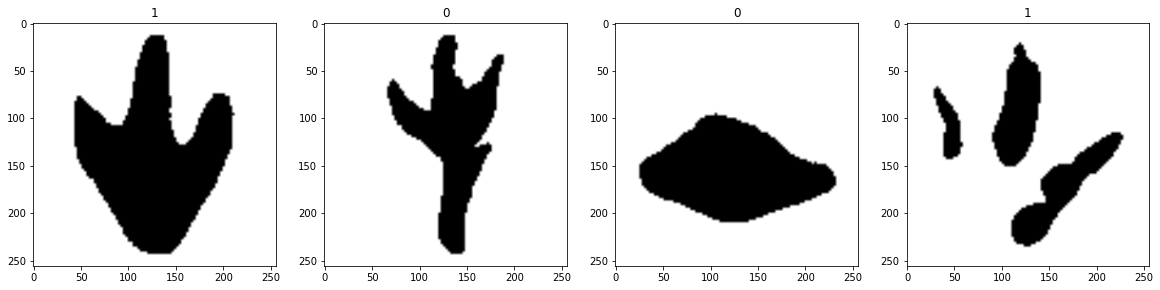

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
data.as_numpy_iterator().next()

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

37

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
37/37 [==============================] - 19s 185ms/step - loss: 0.5719 - accuracy: 0.7128 - val_loss: 0.4603 - val_accuracy: 0.8000
Epoch 2/20
37/37 [==============================] - 6s 149ms/step - loss: 0.4205 - accuracy: 0.8091 - val_loss: 0.4559 - val_accuracy: 0.7969
Epoch 3/20
37/37 [==============================] - 7s 184ms/step - loss: 0.3476 - accuracy: 0.8446 - val_loss: 0.4246 - val_accuracy: 0.8219
Epoch 4/20
37/37 [==============================] - 8s 218ms/step - loss: 0.2747 - accuracy: 0.8868 - val_loss: 0.4605 - val_accuracy: 0.8219
Epoch 5/20
37/37 [==============================] - 6s 151ms/step - loss: 0.1898 - accuracy: 0.9316 - val_loss: 0.4445 - val_accuracy: 0.8281
Epoch 6/20
37/37 [==============================] - 9s 226ms/step - loss: 0.1494 - accuracy: 0.9476 - val_loss: 0.3979 - val_accuracy: 0.8594
Epoch 7/20
37/37 [==============================] - 7s 183ms/step - loss: 0.0810 - accuracy: 0.9764 - val_loss: 0.4735 - val_accuracy: 0.8844
Epoch

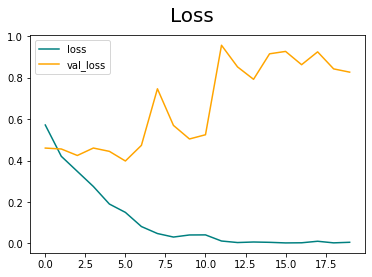

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

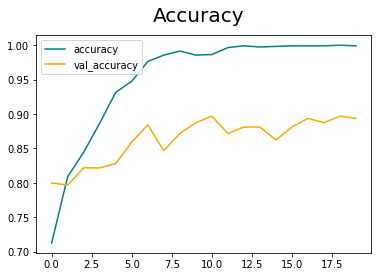

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 42ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.8541667, shape=(), dtype=float32) tf.Tensor(0.86315787, shape=(), dtype=float32) tf.Tensor(0.83125, shape=(), dtype=float32)


In [ ]:
import cv2

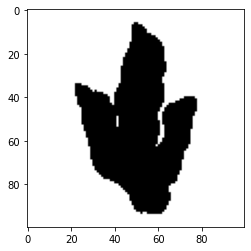

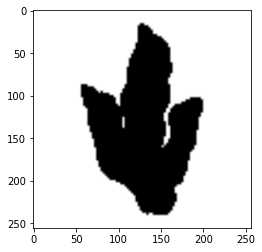

In [ ]:
test_dir = '/content/drive/MyDrive/ML/dinofoot/rsif-2022-0588-File007/dataset/theropod/farlow_2018_10.png'
img = cv2.imread(test_dir)
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat < 0.5: 
    print(f'Predicted class is Ornithischian')
else:
    print(f'Predicted class is Theropod')

1/1 [==============================] - 0s 20ms/step
Predicted class is Theropod


In [ ]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','dinotrackclassifier.h5'))
new_model = load_model('dinotrackclassifier.h5')
new_model.predict(np.expand_dims(resize/255, 0))

Predicted class is Theropod
